<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><strong>Описание проекта</strong></a></span><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.1">Описание данных</a></span></li></ul></li><li><span><a href="#Исследование-данных" data-toc-modified-id="Исследование-данных-2"><strong>Исследование данных</strong></a></span><ul class="toc-item"><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-2.1">Знакомство с данными</a></span></li><li><span><a href="#Пропуски,-дубликаты-и-типы-данных" data-toc-modified-id="Пропуски,-дубликаты-и-типы-данных-2.2">Пропуски, дубликаты и типы данных</a></span></li><li><span><a href="#Пропущенные-значения" data-toc-modified-id="Пропущенные-значения-2.3">Пропущенные значения</a></span></li><li><span><a href="#Сравнение-ушедших-и-оставшихся" data-toc-modified-id="Сравнение-ушедших-и-оставшихся-2.4">Сравнение ушедших и оставшихся</a></span><ul class="toc-item"><li><span><a href="#Средние-значения" data-toc-modified-id="Средние-значения-2.4.1">Средние значения</a></span></li><li><span><a href="#Визуализация" data-toc-modified-id="Визуализация-2.4.2">Визуализация</a></span></li><li><span><a href="#Корреляция" data-toc-modified-id="Корреляция-2.4.3">Корреляция</a></span></li></ul></li></ul></li><li><span><a href="#Модель-прогнозирования-оттока-пользователей" data-toc-modified-id="Модель-прогнозирования-оттока-пользователей-3"><strong>Модель прогнозирования оттока пользователей</strong></a></span><ul class="toc-item"><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-3.1">Обучение модели</a></span></li><li><span><a href="#Показатели-модели" data-toc-modified-id="Показатели-модели-3.2">Показатели модели</a></span></li></ul></li><li><span><a href="#Кластеризация" data-toc-modified-id="Кластеризация-4"><strong>Кластеризация</strong></a></span><ul class="toc-item"><li><span><a href="#Матрица-расстояний" data-toc-modified-id="Матрица-расстояний-4.1">Матрица расстояний</a></span></li><li><span><a href="#Прогнозирование-кластеров" data-toc-modified-id="Прогнозирование-кластеров-4.2">Прогнозирование кластеров</a></span></li><li><span><a href="#Признаки-в-каждом-кластере" data-toc-modified-id="Признаки-в-каждом-кластере-4.3">Признаки в каждом кластере</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><strong>Выводы</strong></a></span></li></ul></div>

# **Описание проекта**
Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с пользователями на основе аналитических данных.  

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал.  

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество анкет пользователей. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.  

## Описание данных
Факт оттока:
- *Churn* — факт оттока в текущем месяце.  

Данные пользователя за предыдущий до проверки факта оттока месяц:  
- *gender* — пол;
- *Near_Location* — проживание или работа в районе, где находится фитнес-центр;
- *Partner* — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- *Phone* — наличие контактного телефона;
- *Age* — возраст;
- *Lifetime* — время с момента первого обращения в фитнес-центр (в месяцах).  

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
- *Contract_period* — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
- *Month_to_end_contract* — срок до окончания текущего действующего абонемента (в месяцах);
- *Group_visits* — факт посещения групповых занятий;
- *Avg_class_frequency_total* — средняя частота посещений в неделю за все время с начала действия абонемента;
- *Avg_class_frequency_current_month* — средняя частота посещений в неделю за предыдущий месяц;
- *Avg_additional_charges_total* — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

# **Исследование данных**

## Знакомство с данными

In [1]:
import pandas as pd
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as sm
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [2]:
# графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg'
# чтобы отображались все столбцы, если их будет много
pd.set_option('display.max_columns', None)
# для отображения полных строк
pd.set_option('display.max_colwidth', 1000)

In [3]:
gym_churn = pd.read_csv('../datasets/gym_churn.csv')

In [4]:
# оценим размеры данных и посмотрим на первые строки данных
print ('Size of {}: {}'.format('gym_churn.csv', gym_churn.shape))
display(HTML(gym_churn.head(3).to_html()))

Size of gym_churn.csv: (4000, 14)


## Пропуски, дубликаты и типы данных

In [5]:
def isnull_percent(data, text):
    print ('Доля пропущенных значений '+text+':')
    print ((data.isnull().sum() / data.shape[0]).apply('{:.2%}'.format))

In [6]:
isnull_percent(gym_churn, 'gym_churn')

Доля пропущенных значений gym_churn:
gender                               0.00%
Near_Location                        0.00%
Partner                              0.00%
Promo_friends                        0.00%
Phone                                0.00%
Contract_period                      0.00%
Group_visits                         0.00%
Age                                  0.00%
Avg_additional_charges_total         0.00%
Month_to_end_contract                0.00%
Lifetime                             0.00%
Avg_class_frequency_total            0.00%
Avg_class_frequency_current_month    0.00%
Churn                                0.00%
dtype: object


Пропущенных значений нет, проверим наличие дубликатов.

In [7]:
print ('Количество дубликатов:', len(gym_churn) - len(gym_churn.drop_duplicates()))
print ('Доля дубликатов: {:.2%}'.format((len(gym_churn) - len(gym_churn.drop_duplicates())) / len(gym_churn)))

Количество дубликатов: 0
Доля дубликатов: 0.00%


Дубликатов нет, проверим типы данных.

In [8]:
gym_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


Многие праматеры могут быть булевыми, но для удобства дальнейших рассчётов оставим их целочисленными.

## Пропущенные значения

In [9]:
gym_churn.describe()

gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.000000    27.000000   
50%           1.000000      0.000000    29.000000   
75%           6.000000      1.000000    31.000000   
max          12.000000      1.000000    41.000000   

       Avg_additional_charges_total  Month_to_end_contract     Lifetime  \
count                   4000.000000            4000.000000  4000.000000   
mean                     146.943728               4.322750     3.724750   
std                       96.355602               4.191297     3.749267   
min                        0.148205               1.000000     0.000000   
25%                       68.868830               1.000000     1.000000   
50%                      136.220159               1.000000     3.000000   
75%                      210.949625               6.000000     5.000000   
max                      552.590740              12.000000    31.000000   

       Avg_class_frequency_total  Avg_class_frequency_current_month  \
count                4000.000000                        4000.000000   
mean                    1.879020                           1.767052   
std                     0.972245                           1.052906   
min                     0.000000                           0.000000   
25%                     1.180875                           0.963003   
50%                     1.832768                           1.719574   
75%                     2.536078                           2.510336   
max                     6.023668                           6.146783   

             Churn  
count  4000.000000  
mean      0.265250  
std       0.441521  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

Для каждого признака присутствуют разные значения, то есть нет такого, чтобы для всех объектов какой-то признак имел одно и то же значение.

## Сравнение ушедших и оставшихся

### Средние значения

In [10]:
# используем describe() для вывода среднего и стандартного отклонения обеих групп по признакам
gym_churn.groupby('Churn').describe().T.reset_index().query('level_1 == "mean"')\
.set_index('level_0').drop(['level_1'], axis = 1).rename(columns = {0:'remaining', 1:'gone'})

Churn                               remaining        gone
level_0                                                  
gender                               0.510037    0.510839
Near_Location                        0.873086    0.768143
Partner                              0.534195    0.355325
Promo_friends                        0.353522    0.183789
Phone                                0.903709    0.902922
Contract_period                      5.747193    1.728558
Group_visits                         0.464103    0.268615
Age                                 29.976523   26.989632
Avg_additional_charges_total       158.445715  115.082899
Month_to_end_contract                5.283089    1.662582
Lifetime                             4.711807    0.990575
Avg_class_frequency_total            2.024876    1.474995
Avg_class_frequency_current_month    2.027882    1.044546

Пол человека и наличие его телефона в базе вряд ли влияют на его решение уйти. Но всё остальное может иметь значение.

### Визуализация

In [11]:
if not os.path.exists('../images'):
    os.makedirs('../images')

In [12]:
def add_total(data1, data2, mark):
    total_map = {}
    for row in data1[mark].unique():
        total_map[row] = data1.loc[data1[mark] == row, 'count'].max()
    data2['total'] = data2[mark].map(total_map)

In [13]:
def create_data(datafr, mark, mark_value1 = '', mark_value2 = ''):
    df1 = datafr[[mark, 'Churn']].query('Churn == 0').groupby(mark).count().reset_index()\
        .rename(columns = {'Churn':'count'})
    df2 = datafr[[mark, 'Churn']].query('Churn == 1').groupby(mark).count().reset_index()\
        .rename(columns = {'Churn':'count'})
    
    df1_list = df1[mark].unique()
    df2_list = df2[mark].unique()
    for row in df2_list:
        if row not in df1_list:
            df1.loc[df1.shape[0], mark] = row
            df1.loc[df1.shape[0] - 1, 'count'] = 0
    df1['Churn'] = 0
    for row in df1_list:
        if row not in df2_list:
            df2.loc[df2.shape[0], mark] = row
            df2.loc[df2.shape[0] - 1, 'count'] = 0
    df2['Churn'] = 1

    data = pd.concat([df1.sort_values(mark), df2.sort_values(mark)])
    data_total = data.groupby(mark)['count'].sum().reset_index()
    add_total(data_total, data, mark)
    data['percent'] = data['count'] / data['total'] * 100
    data.loc[data['Churn'] == 0, 'Churn'] = 'оставшиеся'
    data.loc[data['Churn'] == 1, 'Churn'] = 'ушедшие'
    if mark_value1 != '':
        data.loc[data[mark] == 0, mark] = mark_value1
        data.loc[data[mark] == 1, mark] = mark_value2
    return data

In [14]:
def plot_mark_cat(datafr, mark, title, size_x, mark_value1 = '', mark_value2 = '', png_name = ''):
    f, ax = plt.subplots(figsize = (size_x, 3))
    sns.set_style('whitegrid')
    data = create_data(datafr, mark, mark_value1, mark_value2)
    ax1 = sns.barplot(x = mark, y = 'count', data = data, palette = ['#18A7A7', '#73D4D4'], hue = 'Churn')
    
    # добавляем подписи процентов на график
    rects = ax1.patches
    texts = data['percent'].values
    vals = data['count'].astype(int).values
    maxh = 0
    for rect, label, val in zip(rects, texts, vals):
        height = rect.get_height()
        if np.isnan(height):
            continue
        rot = 0
        if size_x > 7:
            rot = 90
        ax1.text(rect.get_x() + 0.2, height + 20, str(round(label, 2))+'% ({})'.format(val),
                 color = 'k', ha = "center", fontsize = 8, rotation = rot)
        if maxh < height:
            maxh = height
    # устанавливаем ширину области графика, чтобы подписи процентов влезали
    delta = 150
    if size_x == 10:
        delta = 300
    elif size_x == 9:
        delta = 650
    ax.set_ylim(0, maxh + delta)
    
    # настраиваем отображение легенды, названия и подписей осей
    l = ax.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)
    l.set_title('Отток')
    ax.set_title(title, loc = 'left')
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    plt.savefig('../images/'+png_name+'.png', bbox_inches = 'tight')
    plt.show()

In [15]:
# категориальные признаки
mark_list = ['Group_visits', 'Near_Location', 'Partner', 'Phone', 'Promo_friends', 'gender',
             'Contract_period', 'Age', 'Lifetime', 'Month_to_end_contract']
title_list = ['Посещение групповых занятий', 'Проживание или работа в районе с фитнес-клубом',
              'Сотрудник компании-партнёра', 'Наличие контактного телефона',
              'Факт первоначальной записи в рамках акции «приведи друга»', 'Пол',
              'Длительность текущего действующего абонемента', 'Возраст',
              'Время с момента первого обращения в фитнес-клуб (в месяцах)',
              'Срок до окончания текущего действующего абонемента (в месяцах)']
label_list = [['без групповых занятий', 'с групповыми занятиями'], ['в другом районе', 'рядом с клубом'],
              ['не сотрудники', 'сотрудники'], ['без телефонов', 'с телефонами'],
              ['не от друзей', 'от друзей'], ['женщины', 'мужчины'], ['', ''], ['', ''], ['', ''], ['', '']]
png_list = ['Group_visits', 'Near_Location', 'Partner', 'Phone', 'Promo_friends', 'gender',
             'Contract_period', 'Age', 'Lifetime', 'Month_to_end_contract']
size_list = [7, 7, 7, 7, 7, 7, 7, 10, 10, 9]

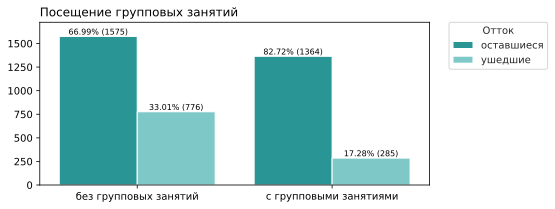

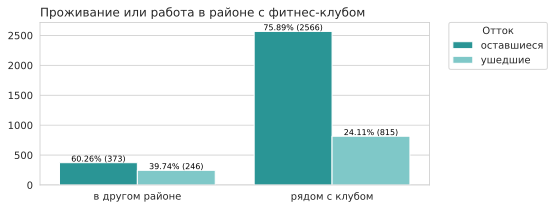

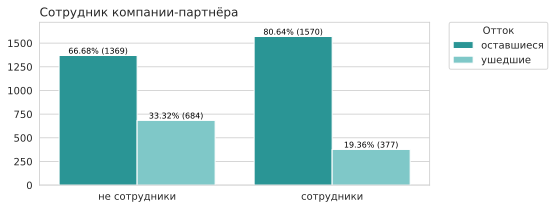

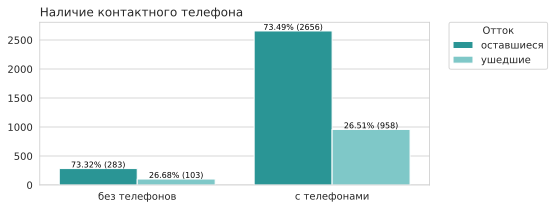

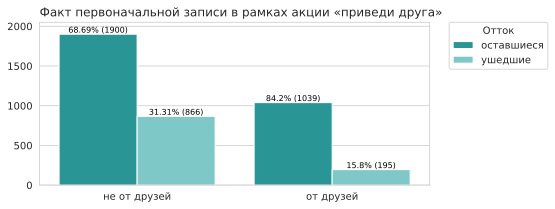

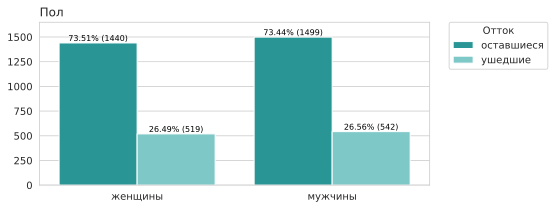

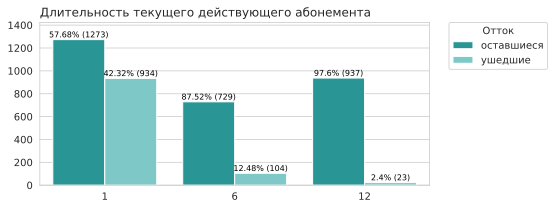

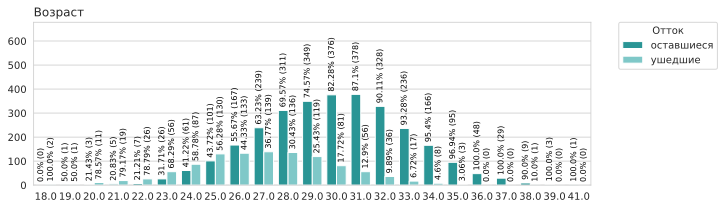

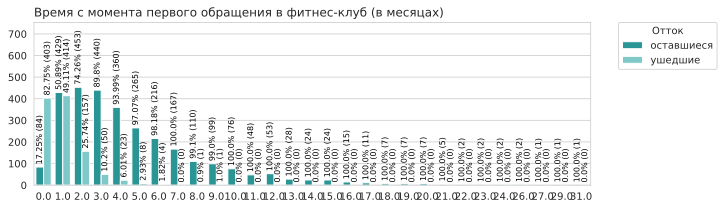

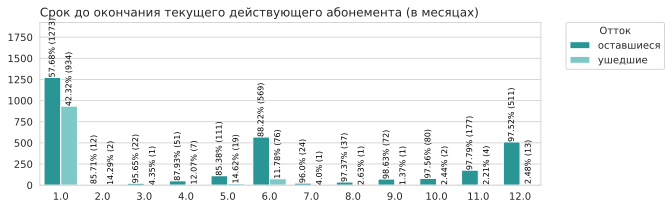

In [16]:
for mark, title, label, png, size_x in zip(mark_list, title_list, label_list, png_list, size_list):
    plot_mark_cat(gym_churn, mark, title, size_x, label[0], label[1], png)

Как правило доля ушедших при отсутствии признака (не посещали группы, живут не рядом с клубом, не сотрудники компаний-партнёров и т.д.) почти в 2 раза выше, чем при наличии признака.  
Доля оттока по признакам наличия телефона в базе и гендерной принадлежности для обеих категорий признаков примерно одинакова, как и предполагалось.

In [17]:
def plot_mark_num(data, mark, title, size_x, png_name):
    ax = data.boxplot(column = mark,
                           by = 'Churn', grid = True,
                           figsize = (size_x, 4), sym = '+')
    plt.title('')
    plt.figtext(0.5, 1.01, title, fontsize = 12, ha = 'center')
    labels = [item.get_text() for item in ax.get_xticklabels()]
    labels[:] = ['оставшиеся', 'ушедшие']
    ax.set_xticklabels(labels)
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    plt.savefig('../images/'+png_name+'.png', bbox_inches = 'tight')
    plt.show()

In [18]:
# количественные признаки
mark_list = ['Avg_additional_charges_total', 'Avg_class_frequency_current_month', 'Avg_class_frequency_total']
title_list = ['Выручка от других услуг фитнес-центра', 'Средняя частота посещений в неделю за предыдущий месяц',
              'Средняя частота посещений в неделю за все время']
png_list = ['Avg_additional_charges_total', 'Avg_class_frequency_current_month', 'Avg_class_frequency_total']
size_list = [5, 5, 5]

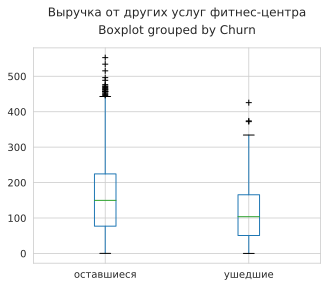

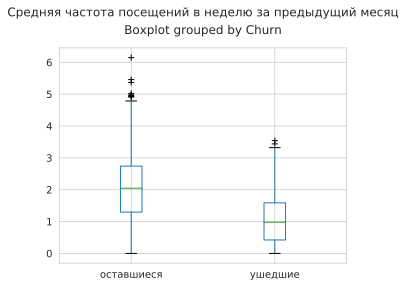

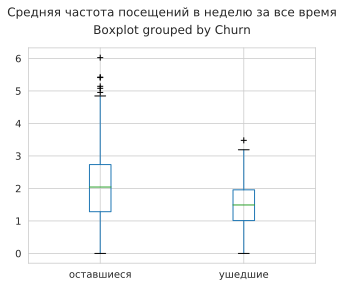

In [19]:
for mark, title, png, size_x in zip(mark_list, title_list, png_list, size_list):
    plot_mark_num(gym_churn, mark, title, size_x, png)

По количественным признакам оставшиеся имеют более высокие средние показатели и больший разброс в сторону увеличения значения признака.

### Корреляция

In [20]:
from scipy.stats import norm 

In [21]:
mark_list = ['Group_visits', 'Near_Location', 'Partner', 'Phone', 'Promo_friends', 'gender',
             'Contract_period', 'Age', 'Lifetime', 'Month_to_end_contract',
             'Avg_additional_charges_total', 'Avg_class_frequency_current_month',
             'Avg_class_frequency_total', 'Churn']
title_list = ['Посещение групповых занятий', 'Проживание или работа в районе с фитнес-клубом',
              'Сотрудник компании-партнёра', 'Наличие контактного телефона',
              'Факт первоначальной записи «от друга»', 'Пол',
              'Длительность текущего действующего абонемента', 'Возраст',
              'Время с момента первого обращения (в месяцах)',
              'Срок до окончания текущего абонемента (в месяцах)',
              'Выручка от других услуг фитнес-центра', 'Средняя частота посещений в неделю за прошлый месяц',
              'Средняя частота посещений в неделю за все время', 'Отток']
mark_dict = {}
for i in range(len(mark_list)):
    mark_dict[mark_list[i]] = title_list[i]

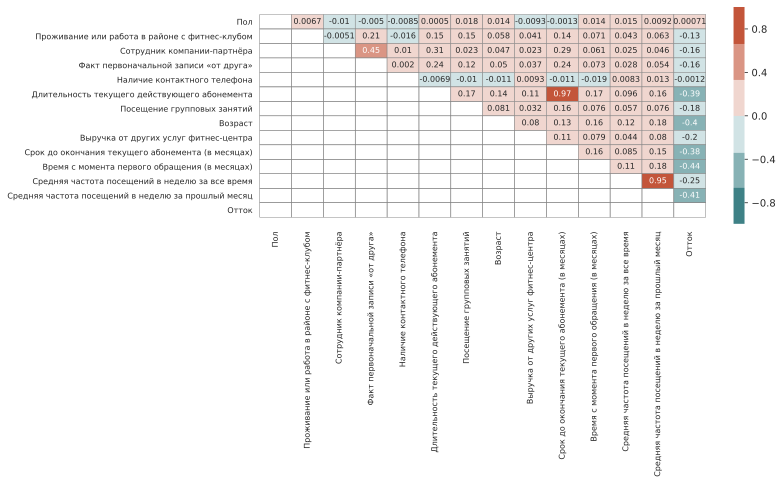

In [22]:
corr = gym_churn.corr()
lower = np.tril(corr)
f, ax = plt.subplots(figsize = (10, 4))
annot_kws = {'fontsize': 8, 'verticalalignment': 'center'}
ax = sns.heatmap(corr, vmin = -1, vmax = 1, center = 0, annot_kws = annot_kws,
                 cmap = sns.diverging_palette(200, 20), annot = True, mask = lower,
                 linewidths = 0.5, linecolor = 'gray'
                )
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 1, top - 1)
new_labels = []
for row in ax.get_xticklabels():
    new_labels.append(mark_dict[row.get_text()])
ax.set_xticklabels(new_labels, horizontalalignment = 'center', rotation = 90, fontsize = 8)
ax.set_yticklabels(new_labels, fontsize = 8)
plt.savefig('../images/Corr_heatmap.png', bbox_inches = 'tight')
plt.show()

Срок до окончания действия абонемента сильно зависит от длительности действия абонемента. Как и частота посещений за прошлый месяц от частоты посещений в месяц за всё время, что достаточно очевидно.  
Видимо, многие, кто пришёл по акции "приведи друга" работают вместе с друзьями в компаниях-партнёрах фитнес-клуба.  
Кажется, что на отток никак не влияют наличие телефона в базе и гендерная принадлежность, как и было замечено ранее.

# **Модель прогнозирования оттока пользователей**

In [23]:
features = gym_churn.drop(['Churn'], axis=1)
target = gym_churn['Churn']

df_train, df_valid = train_test_split(gym_churn, test_size = 0.25, random_state = 12345)

features_train = df_train.drop(['Churn'], axis = 1)
target_train = df_train['Churn']
features_valid = df_valid.drop(['Churn'], axis = 1)
target_valid = df_valid['Churn']

## Обучение модели

In [24]:
best_accuracy = 0
best_precision = 0
best_recall = 0
best_fscore = 0

res_acc = ''
res_pre = ''
res_rec = ''
res_fsc = ''

In [25]:
# логистическая регрессия

model = LogisticRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
accuracy = sm.accuracy_score(target_valid, predictions)
precision = sm.precision_score(target_valid, predictions)
recall = sm.recall_score(target_valid, predictions)
fscore = sm.f1_score(target_valid, predictions)
print('Logistic:\n\taccuracy =', accuracy, '\n\tprecision =', precision,\
      '\n\trecall =', recall, '\n\tfscore =', fscore)

if accuracy > best_accuracy:
    best_accuracy = accuracy
    res_acc = 'Logistic, accuracy = ' + str(accuracy)
if precision > best_precision:
    best_precision = precision
    res_pre = 'Logistic, precision = ' + str(precision)
if recall > best_recall:
    best_recall = recall
    res_rec = 'Logistic, recall = ' + str(recall)
if fscore > best_fscore:
    best_fscore = fscore
    res_fsc = 'Logistic, fscore = ' + str(fscore)

Logistic:
	accuracy = 0.923 
	precision = 0.8838174273858921 
	recall = 0.8129770992366412 
	fscore = 0.8469184890656064


/usr/local/lib64/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [26]:
# случайный лес

n_estim = 10
for estim in range(10, 51, 2):
    model = RandomForestClassifier(n_estimators = estim, max_depth = 10, random_state = 12345)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    accuracy = sm.accuracy_score(target_valid, predictions)
    precision = sm.precision_score(target_valid, predictions)
    recall = sm.recall_score(target_valid, predictions)
    fscore = sm.f1_score(target_valid, predictions)
    print('n_estimators = ' + str(estim) + ':')
    print('\taccuracy =', accuracy, '\n\tprecision =', precision,\
          '\n\trecall =', recall, '\n\tfscore = ', fscore)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        res_acc = 'Forest, n_estimators = ' + str(estim) + ', accuracy = ' + str(accuracy)
    if precision > best_precision:
        best_precision = precision
        res_pre = 'Forest, n_estimators = ' + str(estim) + ', precision = ' + str(precision)
    if recall > best_recall:
        best_recall = recall
        res_rec = 'Forest, n_estimators = ' + str(estim) + ', recall = ' + str(recall)
    if fscore > best_fscore:
        best_fscore = fscore
        res_fsc = 'Forest, n_estimators = ' + str(estim) + ', fscore = ' + str(fscore)

n_estimators = 10:
	accuracy = 0.896 
	precision = 0.8185483870967742 
	recall = 0.7748091603053435 
	fscore =  0.7960784313725491
n_estimators = 12:
	accuracy = 0.906 
	precision = 0.8387096774193549 
	recall = 0.7938931297709924 
	fscore =  0.8156862745098039
n_estimators = 14:
	accuracy = 0.902 
	precision = 0.828 
	recall = 0.7900763358778626 
	fscore =  0.8085937499999999
n_estimators = 16:
	accuracy = 0.901 
	precision = 0.8273092369477911 
	recall = 0.7862595419847328 
	fscore =  0.8062622309197651
n_estimators = 18:
	accuracy = 0.903 
	precision = 0.8260869565217391 
	recall = 0.7977099236641222 
	fscore =  0.8116504854368933
n_estimators = 20:
	accuracy = 0.905 
	precision = 0.8249027237354085 
	recall = 0.8091603053435115 
	fscore =  0.8169556840077071
n_estimators = 22:
	accuracy = 0.903 
	precision = 0.8210116731517509 
	recall = 0.8053435114503816 
	fscore =  0.8131021194605009
n_estimators = 24:
	accuracy = 0.907 
	precision = 0.8287937743190662 
	recall = 0.8129770992366

## Показатели модели

In [27]:
print ('Лучшая модель:')
print ('best_accuracy :', res_acc)
print ('best_precision :', res_pre)
print ('best_recall :', res_rec)
print ('best_fscore :', res_fsc)

Лучшая модель:
best_accuracy : Logistic, accuracy = 0.923
best_precision : Logistic, precision = 0.8838174273858921
best_recall : Forest, n_estimators = 28, recall = 0.8206106870229007
best_fscore : Logistic, fscore = 0.8469184890656064


# **Кластеризация**

In [28]:
sc = StandardScaler()
x_sc = sc.fit_transform(gym_churn)

## Матрица расстояний

In [29]:
linked = linkage(x_sc, method = 'ward')

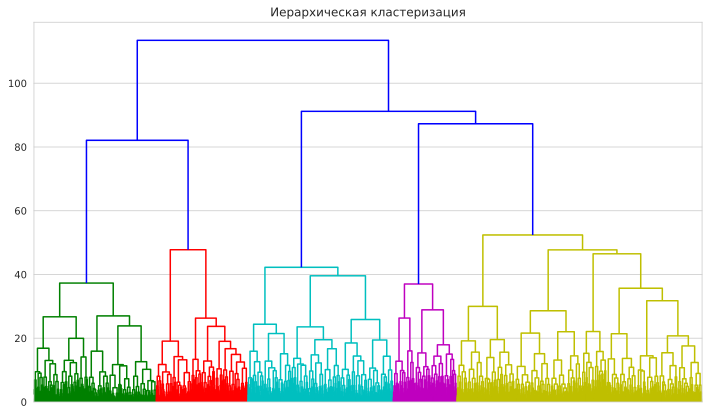

In [30]:
sns.set_style('whitegrid')
plt.figure(figsize = (12, 7))  
dendrogram(linked, orientation = 'top', no_labels = True)
plt.title('Иерархическая кластеризация')
plt.savefig('../images/Hierarchial_clustering.png', bbox_inches = 'tight')
plt.show()

Предложенное оптимальное число кластеров 5 — пять разных цветов на графике.

## Прогнозирование кластеров

In [31]:
km = KMeans(n_clusters = 5)
labels = km.fit_predict(x_sc)
gym_churn['cluster_km'] = labels
gym_churn.groupby(['cluster_km']).mean().reset_index()

cluster_km    gender  Near_Location   Partner  Promo_friends     Phone  \
0           0  0.526178       0.869110  0.471204       0.308901  0.000000   
1           1  0.504673       0.938733  0.768432       0.561786  1.000000   
2           2  0.506908       0.759830  0.341126       0.179596  0.996812   
3           3  0.553846       0.839053  0.370414       0.210651  0.998817   
4           4  0.470656       0.829689  0.452244       0.262371  1.000000   

   Contract_period  Group_visits        Age  Avg_additional_charges_total  \
0         4.816754      0.429319  29.340314                    144.517762   
1        11.196262      0.559709  29.894081                    162.321072   
2         1.566419      0.257173  26.907545                    114.993470   
3         2.720710      0.437870  29.978698                    159.287758   
4         2.681243      0.384350  30.021864                    153.563778   

   Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
0               4.502618  3.955497                   1.857525   
1              10.238837  4.701973                   2.018679   
2               1.513284  0.975558                   1.448150   
3               2.507692  4.600000                   2.927270   
4               2.494822  4.666283                   1.180971   

   Avg_class_frequency_current_month     Churn  
0                           1.727260  0.261780  
1                           2.013067  0.015576  
2                           1.025562  0.997875  
3                           2.933800  0.007101  
4                           1.180318  0.001151

Уже видно, что люди из кластера под номером 3 практически не остаются. Для них меньше показатели проживания или работы рядом с фитнес-центром и факта посещения по промо-коду друзей, меньше длительность действия абонемента и меньше средний возраст по сравнению с остальными группами.

## Признаки в каждом кластере

In [32]:
# категориальные признаки
mark_list = ['Group_visits', 'Near_Location', 'Partner', 'Phone', 'Promo_friends', 'gender',
             'Contract_period', 'Age', 'Lifetime', 'Month_to_end_contract']
title_list = ['Посещение групповых занятий', 'Проживание или работа в районе с фитнес-клубом',
              'Сотрудник компании-партнёра', 'Наличие контактного телефона',
              'Факт первоначальной записи в рамках акции «приведи друга»', 'Пол',
              'Длительность текущего действующего абонемента', 'Возраст',
              'Время с момента первого обращения в фитнес-клуб (в месяцах)',
              'Срок до окончания текущего действующего абонемента (в месяцах)']
label_list = [['без групповых занятий', 'с групповыми занятиями'], ['в другом районе', 'рядом с клубом'],
              ['не сотрудники', 'сотрудники'], ['без телефонов', 'с телефонами'],
              ['не от друзей', 'от друзей'], ['женщины', 'мужчины'], ['', ''], ['', ''], ['', ''], ['', '']]
png_list = ['Group_visits', 'Near_Location', 'Partner', 'Phone', 'Promo_friends', 'gender',
             'Contract_period', 'Age', 'Lifetime', 'Month_to_end_contract']
size_list = [7, 7, 7, 7, 7, 7, 7, 10, 10, 9]
clusters_list = [gym_churn.query('cluster_km == 0'), gym_churn.query('cluster_km == 1'),
                 gym_churn.query('cluster_km == 2'), gym_churn.query('cluster_km == 3'),
                 gym_churn.query('cluster_km == 4')]

Кластер 0:


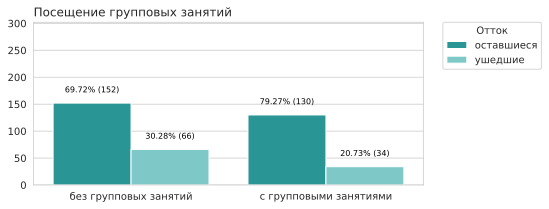

Кластер 1:


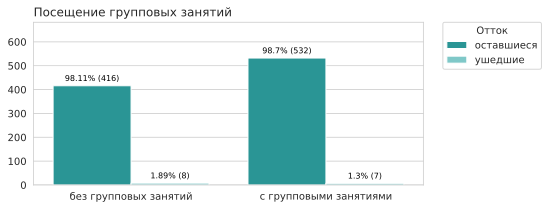

Кластер 2:


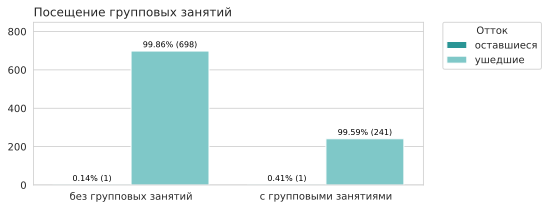

Кластер 3:


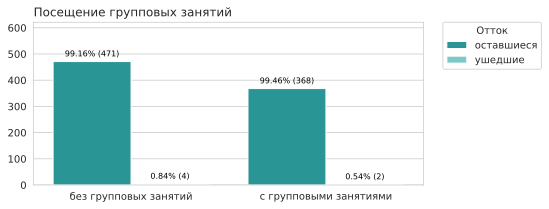

Кластер 4:


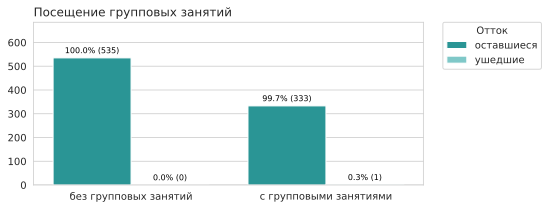

Кластер 0:


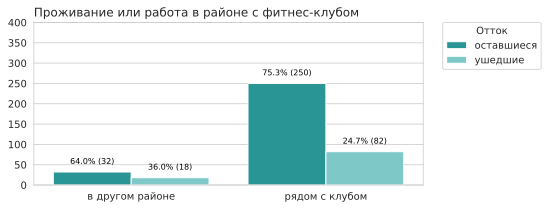

Кластер 1:


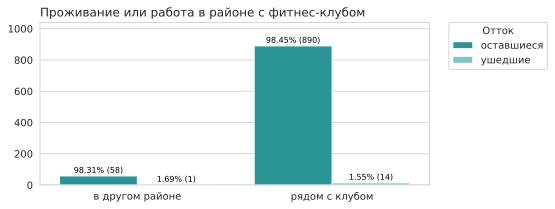

Кластер 2:


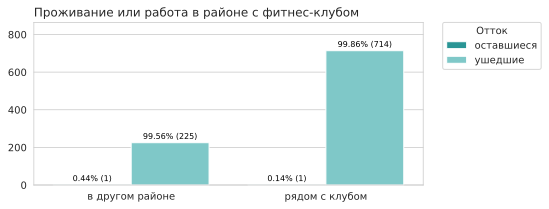

Кластер 3:


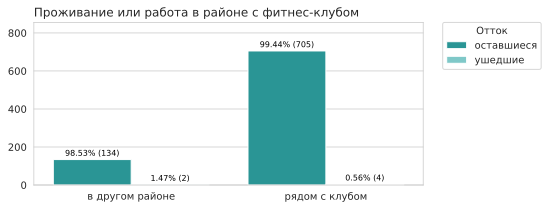

Кластер 4:


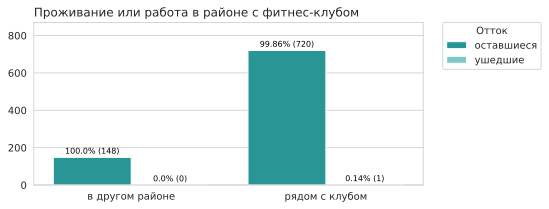

Кластер 0:


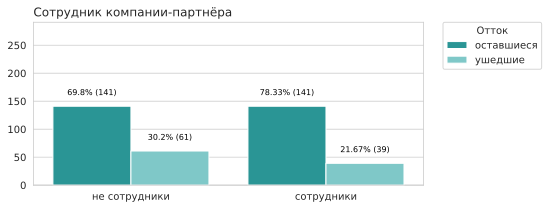

Кластер 1:


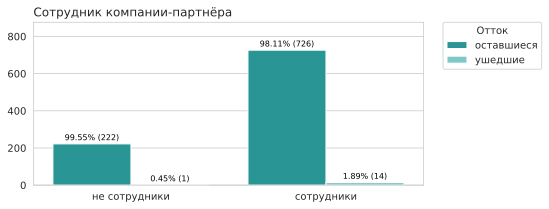

Кластер 2:


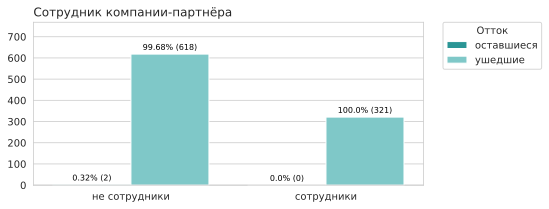

Кластер 3:


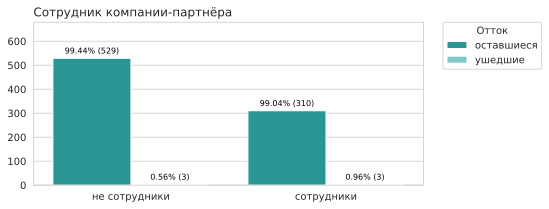

Кластер 4:


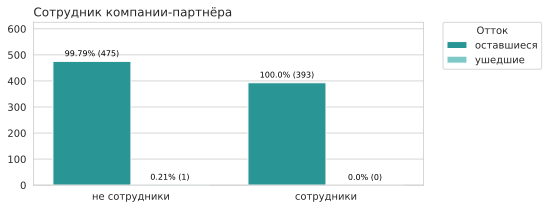

Кластер 0:


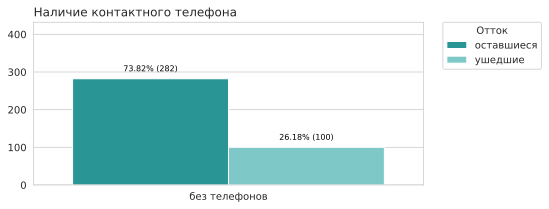

Кластер 1:


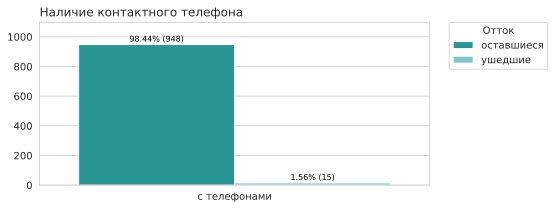

Кластер 2:


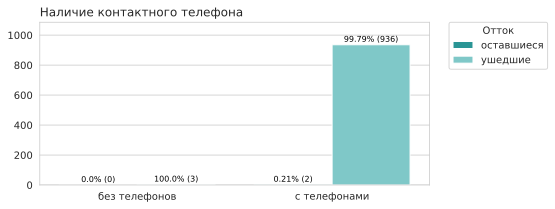

Кластер 3:


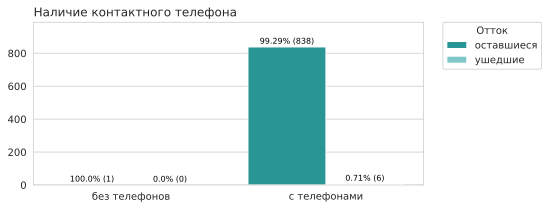

Кластер 4:


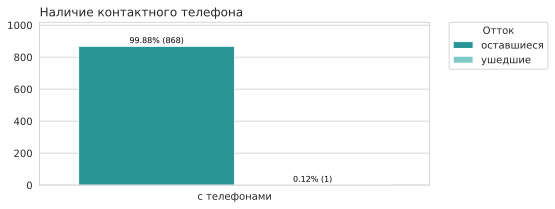

Кластер 0:


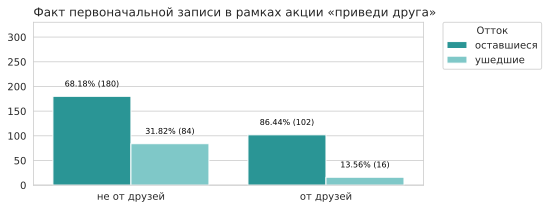

Кластер 1:


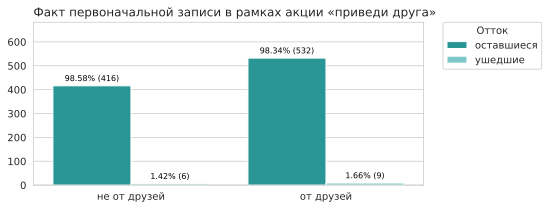

Кластер 2:


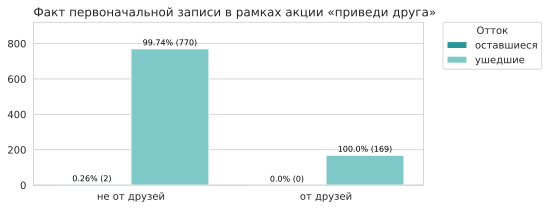

Кластер 3:


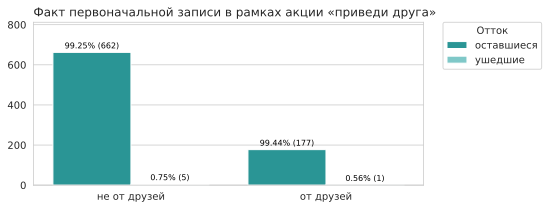

Кластер 4:


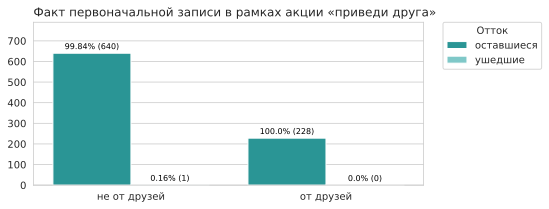

Кластер 0:


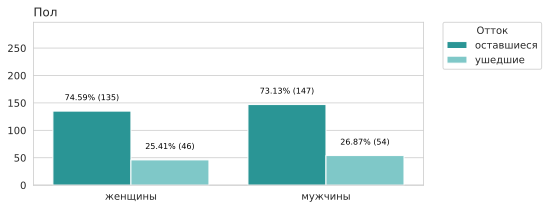

Кластер 1:


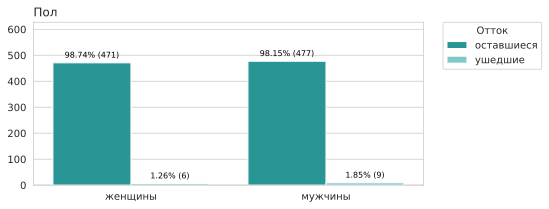

Кластер 2:


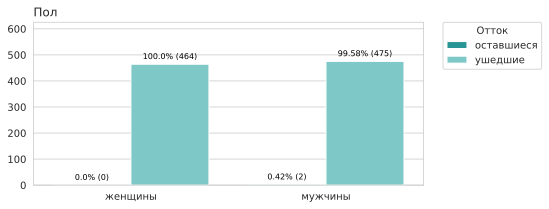

Кластер 3:


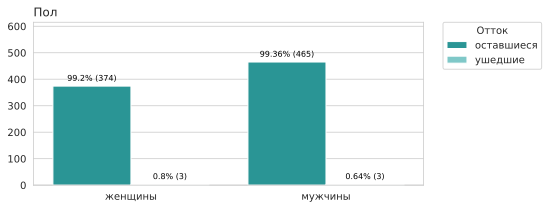

Кластер 4:


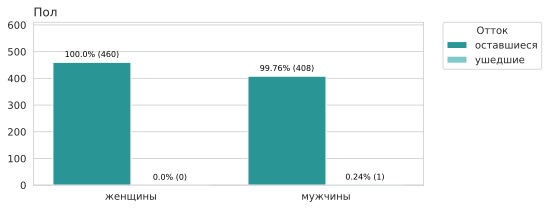

Кластер 0:


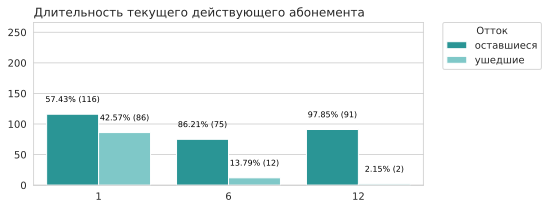

Кластер 1:


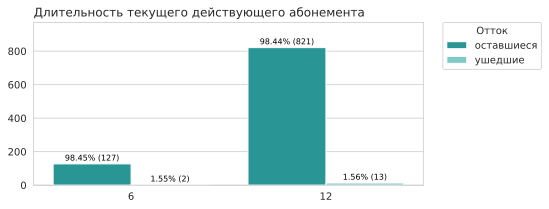

Кластер 2:


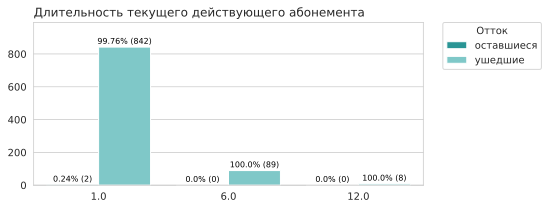

Кластер 3:


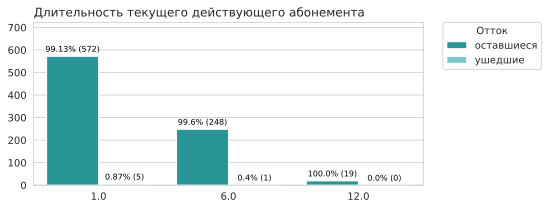

Кластер 4:


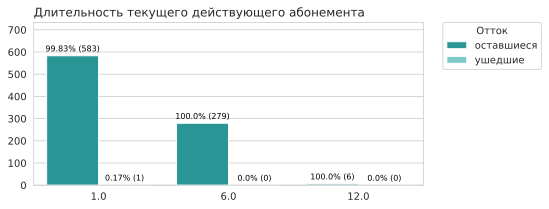

Кластер 0:


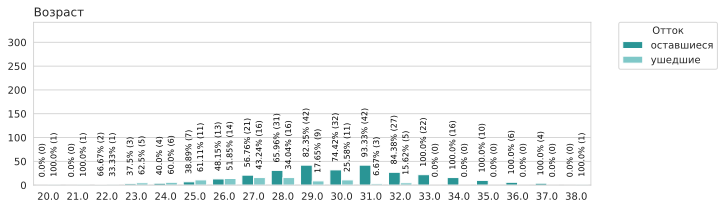

Кластер 1:


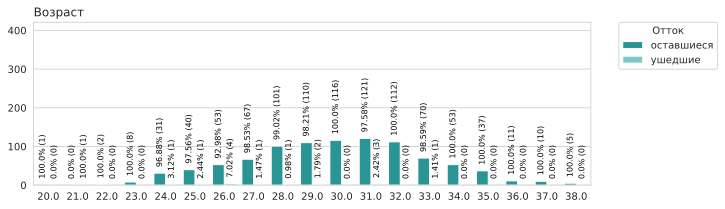

Кластер 2:


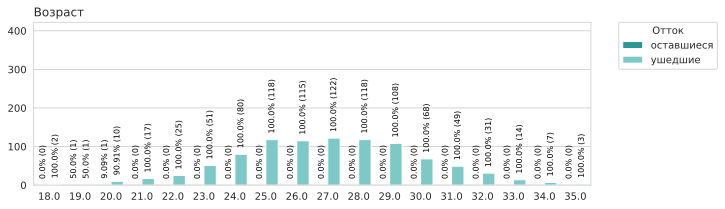

Кластер 3:


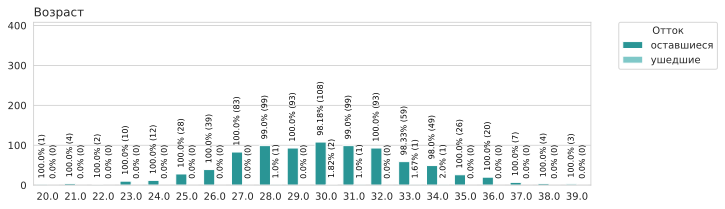

Кластер 4:


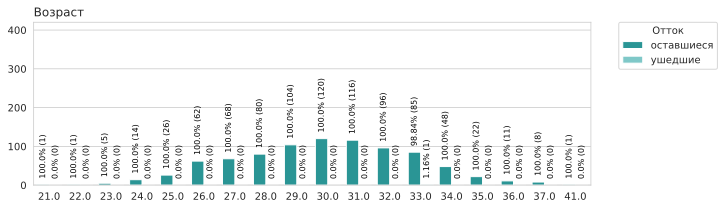

Кластер 0:


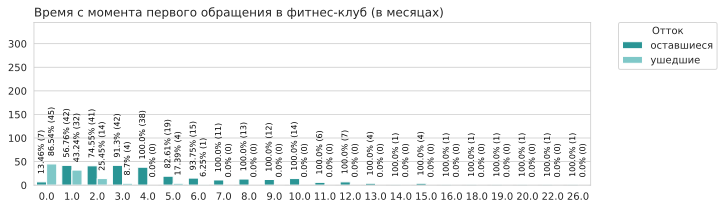

Кластер 1:


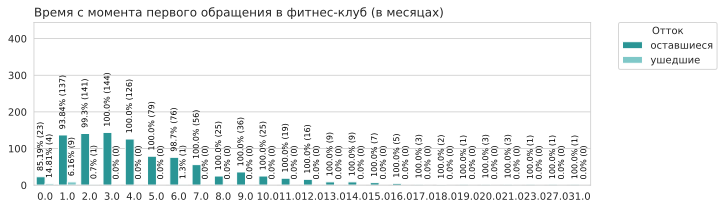

Кластер 2:


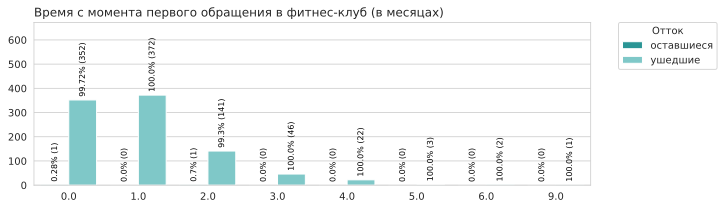

Кластер 3:


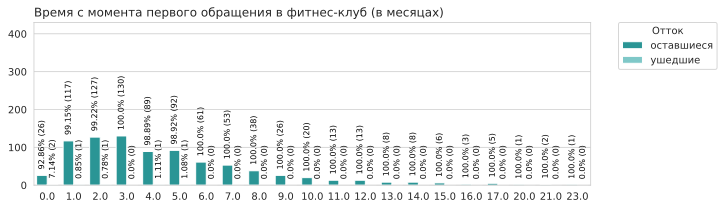

Кластер 4:


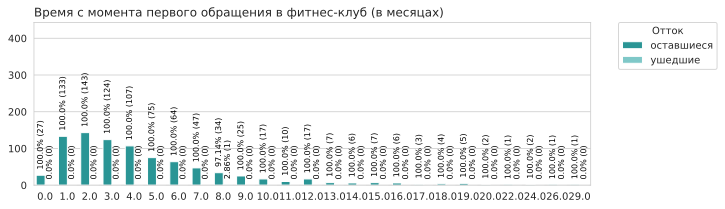

Кластер 0:


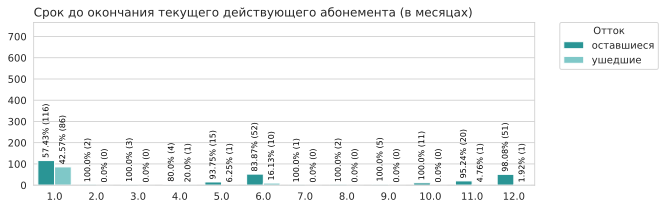

Кластер 1:


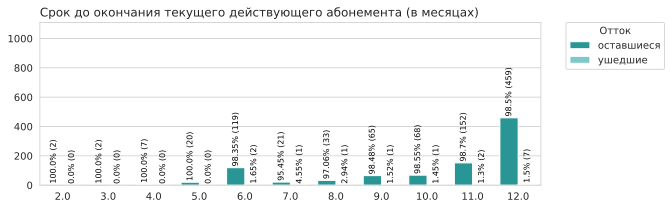

Кластер 2:


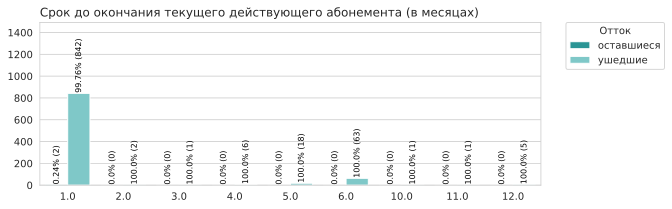

Кластер 3:


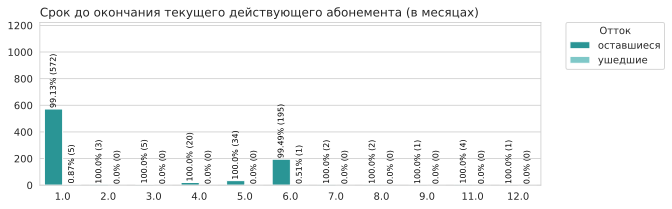

Кластер 4:


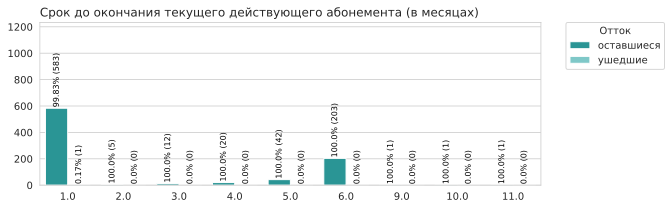

In [33]:
for mark, title, label, png, size_x in zip(mark_list, title_list, label_list, png_list, size_list):
    for i in range(len(clusters_list)):
        print ('Кластер {}:'.format(i))
        plot_mark_cat(clusters_list[i], mark, title, size_x, label[0], label[1], str(png)+'_'+str(i))

In [34]:
# количественные признаки
mark_list = ['Avg_additional_charges_total', 'Avg_class_frequency_current_month', 'Avg_class_frequency_total']
title_list = ['Выручка от других услуг фитнес-центра', 'Средняя частота посещений в неделю за предыдущий месяц',
              'Средняя частота посещений в неделю за все время']
png_list = ['Avg_additional_charges_total', 'Avg_class_frequency_current_month', 'Avg_class_frequency_total']
size_list = [5, 5, 5]
clusters_list = [gym_churn.query('cluster_km == 0'), gym_churn.query('cluster_km == 1'),
                 gym_churn.query('cluster_km == 2'), gym_churn.query('cluster_km == 3'),
                 gym_churn.query('cluster_km == 4')]

Кластер 0:


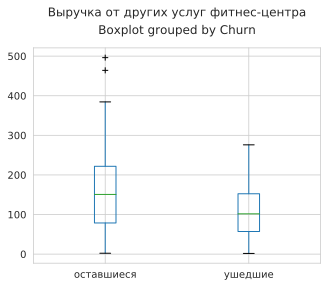

Кластер 1:


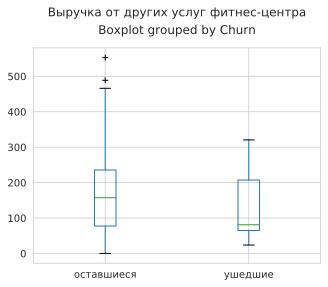

Кластер 2:


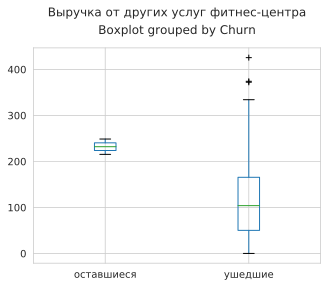

Кластер 3:


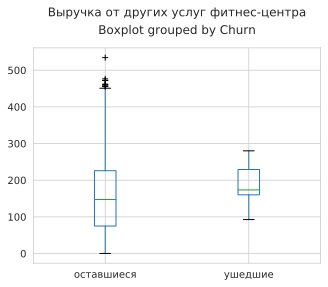

Кластер 4:


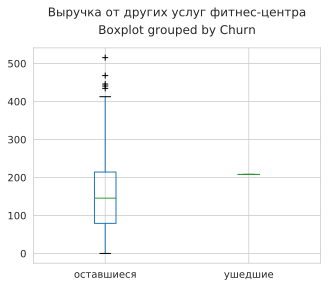

Кластер 0:


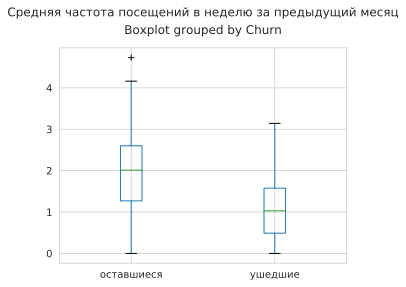

Кластер 1:


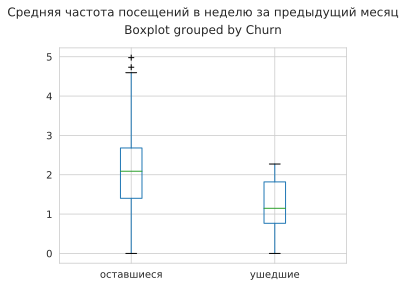

Кластер 2:


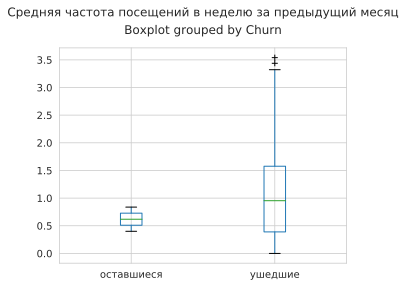

Кластер 3:


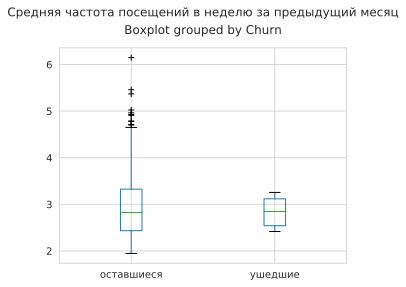

Кластер 4:


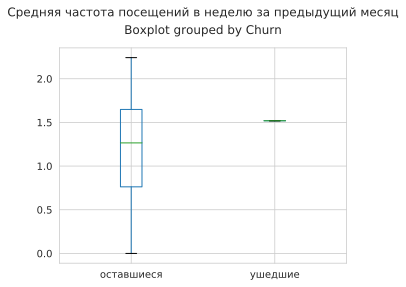

Кластер 0:


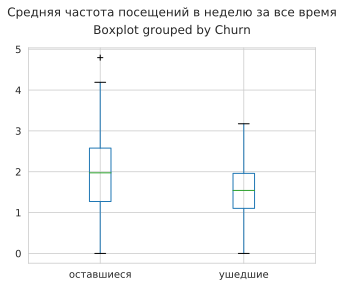

Кластер 1:


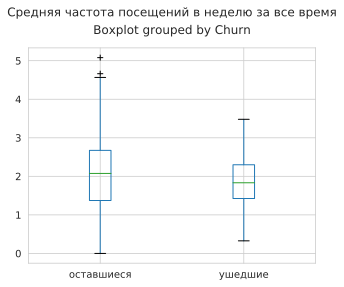

Кластер 2:


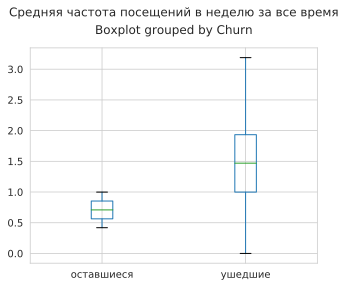

Кластер 3:


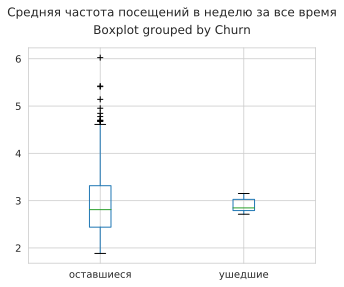

Кластер 4:


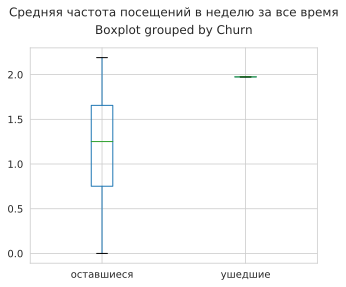

In [35]:
for mark, title, png, size_x in zip(mark_list, title_list, png_list, size_list):
    for i in range(len(clusters_list)):
        print ('Кластер {}:'.format(i))
        plot_mark_num(clusters_list[i], mark, title, size_x, str(png)+'_'+str(i))

Соберём получившиеся графики более наглядно в презентации ([Презентация по признакам с замечаниями](https://yadi.sk/d/Hk4eU04aLQE-_g)).

Составим таблицу сравнения признаков:

Признак|Кластеры с наименьшим количеством ушедших|Кластеры с наибольшим количеством ушедших|Примечания о соотношении
-|-|-|-
Посещение групповых занятий|1, 2, 4|3|во 2 кластере больше посещало групповые занятия, в остальных наоборот
Проживание или работа в районе с фитнес-клубом|1, 2, 4|3|проживающих или работающих рядом всегда больше
Сотрудник компании-партнёра|1, 2, 4|3|во 2 кластере больше сотрудников компаний-партнёров, в остальных наоборот
Наличие контактного телефона|1, 2, 4|3|в 1, 2 и 4 кластере почти у всех есть телефон, в 0 телефона нет ни у кого
Факт первоначальной записи в рамках акции «приведи друга»|1, 2, 4|3|во 2 большинство пришли по рекомендации друзей, в остальных наоборот
Пол|1, 2, 4|3|в 1 немного больше мужчин, в остальных примерно одинаково
Длительность текущего действующего абонемента|1, 2, 4|3|во 2 больше абонементов на год, абонементы на 1 месяц отсутствуют вообще, в 3 больше на 1 месяц, в 0 примерно одинаково, в 1 и 4 больше на месяц, потом полгода, потом год
Возраст|1, 2, 4|3|люди из 3 кластера в среднем на 3-5 лет моложе
Время с момента первого обращения в фитнес-клуб (в месяцах)|1, 2, 4|3|в 3 кластере нет людей, пришедших в фитнес-клуб раньше, чем 10 месяцев назад
Срок до окончания текущего действующего абонемента (в месяцах)|1, 2, 4|3|во 2 кластере срок большинства закончится через год, в остальных группах через 1 месяц
Выручка от других услуг фитнес-центра|1, 4|3|в среднем люди из 0, 1, 2 и 4 кластеров тратят немного больше, чем из 3 кластера
Средняя частота посещений в неделю за предыдущий месяц|1, 4|3|люди из 0, 1 и 2 кластеров посещают клуб чаще
Средняя частота посещений в неделю за все время|1, 4|3|люди из 3 кластера в среднем посещали клуб реже других

In [36]:
outflow = pd.DataFrame(gym_churn.groupby(['cluster_km'])['Churn'].sum() /
                       gym_churn.groupby(['cluster_km'])['Churn'].count()).reset_index()

In [37]:
print ('Доля оттока:')
outflow

Доля оттока:


cluster_km     Churn
0           0  0.261780
1           1  0.015576
2           2  0.997875
3           3  0.007101
4           4  0.001151

Наиболее надёжны 1, 2 и 4 кластеры. В кластере 0 также достаточно небольшая доля оттока, а вот из 3 кластера ушли почти все.  
То же самое видно из результирующей таблицы по признакам.

# **Выводы**
- Наличие телефона и гендерная принадлежность не влияют на вероятность оттока, но телефон может понадобиться для снижения вероятности оттока по другим признакам.  
- Мало людей уходят, если пришли по рекомендации друзей. Возможно, так можно приводить больше людей.  
- Посещение групповых занятий тоже хорошо влияет на клиентов. Возможно, это связано с появлением на них новых друзей, тогда можно, например, организовать для групп из групповых занятий какой-то ещё досуг или дополнительные бонусы, чтобы больше людей стремились посещать групповые занятия.  
- Вероятно, если абонемент куплен на 1 месяц, то человек ещё не понял хочет ли он вообще заниматься и понравится ли ему конкретно в этом клубе. Многие с такими абонементами уходят, и если предполагать, что это «новички», то возможно можно как-то скрасить первый месяц пребывания человека в клубе, чтобы он купил абонемент на более длительный срок. Для этого можно провести отдельное исследование о том сколько людей впервые посетившие клуб покупают следующий абонемент.  
- Мало людей уходят из клуба, если он находится рядом с домом или работой. При открытии новых помещений или переезде нужно учитывать как много людей, заинтересованных в фитнесе могут жить или работать в этом же районе.  
- Если до конца действия абонемента остался месяц, то скорее всего это и был абонемент на месяц. Если это не так, то скорее всего человек устал и отдал предпочтение другим делам: можно предложить ему «заморозить» остаток абонемента на какое-то время.  
- Возможно, существуют подарочные абонементы, которые кому-то подарили, зарегистрировали его, а человек не нашёл время в данный период своей жизни. В таком случае можно попробовать узнать у него, не захочет ли он выбрать другое время «активации» этого абонемента, например, весной, когда может быть не так много работы, но хочется похудеть перед летом.  
- Больше остаются те, кто старше 27. А людям помладше можно предложить занятия в более игровой форме, отмечать достижения в приложении для смартфона, общение с клиентами клуба в мессенджерах и пр. То есть некоторый дополнительный интерактив.  
- При частоте посещения 1 раз в неделю, возможно, эффект от занятий спортом не особо заметен, и люди перестают заниматься спортом. Возможно, можно предоставлять какие-то бонусы при более частом посещении.  

Графики собраны в презентации с комментариями: [презентация для фитнес-клуба "Культурист-датасаентист"](https://yadi.sk/d/Hk4eU04aLQE-_g)